In [1]:
# Dependencies and Setup
import pandas as pd
import missingno as msno
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
from census import Census
from pprint import pprint
from scipy import stats
import gmaps

# Google API Key
from config import gkey
# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# File to Load (Remember to Change These)
shoot_data_to_load = "Data/fatal-police-shootings-data.csv"

# Read shootings data and store into Pandas DataFrames
shoot_data = pd.read_csv(shoot_data_to_load)
shoot_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,6148,NaN,2020-09-05,shot and Tasered,knife,NaN,M,NaN,Chicago,IL,False,attack,Not fleeing,True,-87.747,41.803,True
5620,6142,NaN,2020-09-06,shot,knife,NaN,M,NaN,Summerlin,NV,False,attack,Not fleeing,False,NaN,NaN,True
5621,6144,Refugio Reynaldo Olivo,2020-09-06,shot,knife,49.0,M,NaN,Virginia Beach,VA,False,other,Not fleeing,False,-76.083,36.831,True
5622,6145,Verlon Billy Stiles,2020-09-06,shot,knife,54.0,M,NaN,Spruce Pine,NC,False,other,NaN,False,-82.065,35.918,True


In [3]:
# Check the columns and data type
shoot_data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [4]:
# Dropping the name column(name not required) and id(id is the redundant data)

shoot_data=shoot_data.drop(shoot_data.columns[[0,1]],axis=1)
shoot_data

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,2020-09-05,shot and Tasered,knife,NaN,M,NaN,Chicago,IL,False,attack,Not fleeing,True,-87.747,41.803,True
5620,2020-09-06,shot,knife,NaN,M,NaN,Summerlin,NV,False,attack,Not fleeing,False,NaN,NaN,True
5621,2020-09-06,shot,knife,49.0,M,NaN,Virginia Beach,VA,False,other,Not fleeing,False,-76.083,36.831,True
5622,2020-09-06,shot,knife,54.0,M,NaN,Spruce Pine,NC,False,other,NaN,False,-82.065,35.918,True


In [5]:
#check for missing values
shoot_data.isna().sum()

date                         0
manner_of_death              0
armed                      212
age                        252
gender                       1
race                       591
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       276
body_camera                  0
longitude                  272
latitude                   272
is_geocoding_exact           0
dtype: int64

In [6]:
# Find columns with null values
state_wise_data_null = shoot_data.isnull().any()
state_wise_data_null

date                       False
manner_of_death            False
armed                       True
age                         True
gender                      True
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
longitude                   True
latitude                    True
is_geocoding_exact         False
dtype: bool

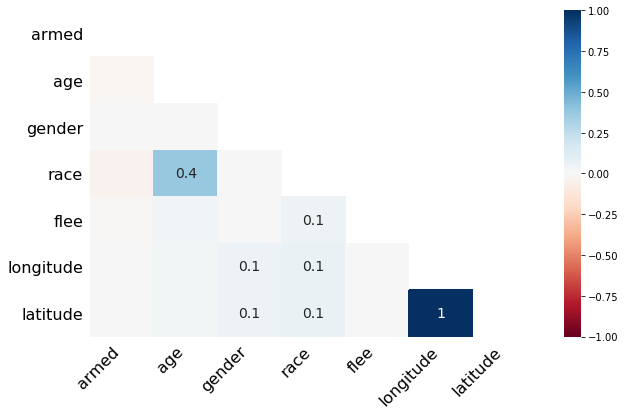

In [7]:
#Checking the heatmap for missing values to confirm
msno.heatmap(shoot_data,figsize=(10,6))
plt.savefig(f"Images/HeatMap.png")
plt.show()

In [8]:
# Checking to see most frequently occurring value 
shoot_data.flee.value_counts()

Not fleeing    3524
Car             924
Foot            722
Other           178
Name: flee, dtype: int64

In [9]:
# Filling the NA value with the most frequently used value
shoot_data.flee.fillna('Not Fleeing',inplace=True)

In [10]:
#Checking the armed column
shoot_data.armed.value_counts()

gun                3190
knife               834
unarmed             356
toy weapon          193
undetermined        172
                   ... 
gun and machete       1
stapler               1
pen                   1
gun and sword         1
motorcycle            1
Name: armed, Length: 95, dtype: int64

In [11]:
# Filling the NA value with the most frequently used value
shoot_data.armed.fillna(shoot_data.armed.value_counts().index[0],inplace=True)

In [12]:
# Drop the rows that have missing values in race,age and gender columns
shoot_data.dropna(axis=0,how='any',inplace=True)


In [13]:
#Displaying the cleaned dataframe
shoot_data

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,2020-09-03,shot,gun,48.0,M,W,Lacey,WA,False,other,Not fleeing,False,-122.823,47.036,True
5615,2020-09-04,shot,gun,33.0,M,B,Syracuse,NY,False,other,Not fleeing,True,-76.148,43.053,True
5616,2020-09-04,shot,gun,38.0,M,W,Lucerne,CA,False,attack,Not fleeing,False,-116.832,34.438,True
5617,2020-09-05,shot,vehicle,22.0,M,W,Battle Creek,MI,False,attack,Car,False,-85.272,42.305,True


In [14]:
# Checking to see data type of the columns

shoot_data.dtypes

date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [15]:
# Changing the format of the date column datatype
shoot_data['date'] = pd.DatetimeIndex(shoot_data['date'])

shoot_data['year'] = pd.DatetimeIndex(shoot_data['date']).year

shoot_data['month'] = pd.DatetimeIndex(shoot_data['date']).month

In [16]:
shoot_data.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1


## Total Police Shootings per State

In [17]:
# Checking the no of deaths in different states
summary_data = shoot_data.stb.freq(['state'],thresh=50)
summary_data

,state,count,percent,cumulative_count,cumulative_percent
0,CA,681,14.406600,681,14.406600
1,TX,420,8.885128,1101,23.291728
2,FL,324,6.854242,1425,30.145970
3,AZ,212,4.484874,1637,34.630844
4,CO,169,3.575206,1806,38.206050
5,GA,154,3.257880,1960,41.463931
6,NC,143,3.025175,2103,44.489105
7,OH,142,3.004019,2245,47.493125
8,others,2482,52.506875,4727,100.000000


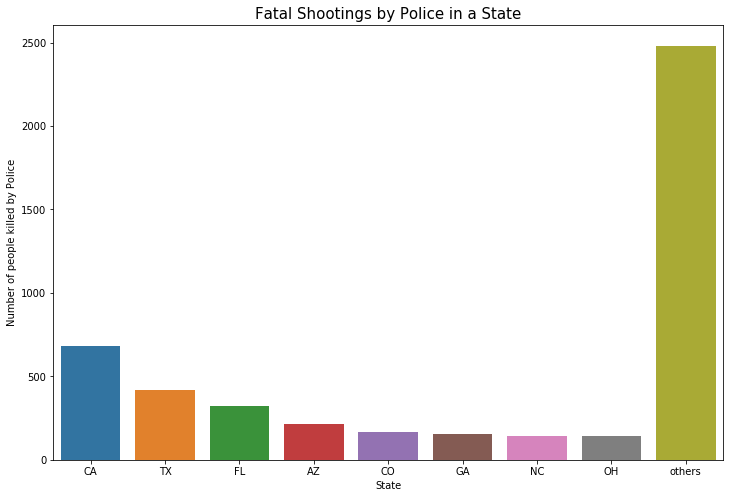

In [18]:
plt.figure(figsize=(12,8))
plt.title("Fatal Shootings by Police in a State", fontsize=15)
sns.barplot(x = 'state',y = 'count',data=summary_data).set(xlabel = 'State',ylabel='Number of people killed by Police')
plt.savefig(f"Images/State.png")
plt.show()

In [19]:
# Selecting the data in major state's where the total no of deaths is higher
shoot_age_filter = shoot_data[(shoot_data.state.isin(["CA","TX","FL","AZ"]))]
shoot_age_filter

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1
6,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True,2015,1
10,2015-01-06,shot and Tasered,knife,25.0,M,W,Stockton,CA,False,attack,Not fleeing,False,-121.299,37.930,True,2015,1
11,2015-01-07,shot,gun,31.0,M,B,Freeport,TX,False,attack,Not fleeing,False,-95.369,28.955,True,2015,1
20,2015-01-09,shot,gun,33.0,M,H,El Paso,TX,False,attack,Not fleeing,False,-106.439,31.858,True,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,2020-08-29,shot,gun,44.0,M,B,Holly Hill,FL,False,attack,Not fleeing,True,-81.049,29.257,True,2020,8
5604,2020-08-29,shot,knife,25.0,M,H,Anaheim,CA,False,other,Not Fleeing,False,-117.879,33.840,True,2020,8
5606,2020-08-31,shot,undetermined,29.0,M,B,Los Angeles,CA,False,attack,Foot,False,-118.296,33.936,True,2020,8
5610,2020-09-01,shot,gun,50.0,M,W,Sacramento,CA,True,attack,Foot,True,-121.474,38.620,True,2020,9


In [20]:
#Grouping data 
shoot_state = shoot_age_filter[['state','age','manner_of_death']].groupby(['state','age']).count().reset_index()

#Renaming the column 
shoot_state.rename(columns={'manner_of_death':'number_of_deaths'},inplace=True)
shoot_state

,state,age,number_of_deaths
0,AZ,17.0,3
1,AZ,18.0,1
2,AZ,19.0,4
3,AZ,20.0,7
4,AZ,21.0,3
...,...,...,...
218,TX,71.0,1
219,TX,73.0,1
220,TX,74.0,1
221,TX,76.0,1


In [21]:
#Dividing the age into different groups

bins =[0,10,20,30,40,50,60,70]
group_names =["0-10","11-20","21-30","31-40","41-50","51-60","61-100"]
shoot_state["age groups"] =pd.cut(shoot_state["age"], bins, labels=group_names, include_lowest=True)
shoot_state.head()

,state,age,number_of_deaths,age groups
0,AZ,17.0,3,11-20
1,AZ,18.0,1,11-20
2,AZ,19.0,4,11-20
3,AZ,20.0,7,11-20
4,AZ,21.0,3,21-30


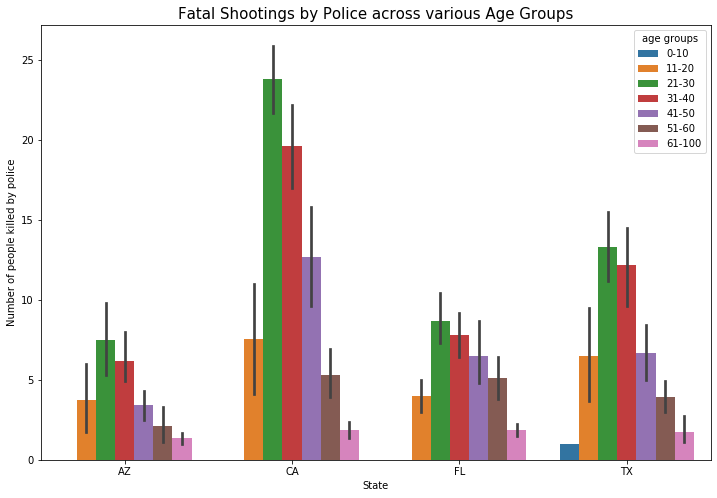

In [22]:
#Plotting the graph 

plt.figure(figsize=(12,8))
plt.title("Fatal Shootings by Police across various Age Groups", fontsize=15)
ax = sns.barplot(x = shoot_state['state'],y = shoot_state['number_of_deaths'],hue=shoot_state['age groups'])
ax.set(xlabel = 'State',ylabel = 'Number of people killed by police')
plt.savefig(f"Images/Age.png")
plt.show()

## Racial Death of People per State

In [23]:
#Grouping the data based on State and Race

state_race = shoot_age_filter[['state','race','armed']].groupby(['state','race']).count().reset_index()

state_race.rename(columns={'armed':'number_of_deaths'},inplace=True)
state_race


,state,race,number_of_deaths
0,AZ,B,17
1,AZ,H,81
2,AZ,N,11
3,AZ,W,103
4,CA,A,27
5,CA,B,122
6,CA,H,305
7,CA,N,4
8,CA,O,8
9,CA,W,215


In [24]:
# File to Load (Remember to Change These)
census_data_to_load = "Data/csvData.csv"

# Read state population by race data and store into pandas dataframes
census_data = pd.read_csv(census_data_to_load)
census_data.head()

,State,WhitePerc,BlackPerc,NativePerc,AsianPerc,IslanderPerc,OtherRacePerc,TwoOrMoreRacesPerc
0,Alabama,0.6819,0.2658,0.0053,0.0133,0.0004,0.0144,0.0188
1,Alaska,0.6484,0.0327,0.1444,0.0630,0.0120,0.0149,0.0846
2,Arizona,0.7722,0.0439,0.0446,0.0329,0.0020,0.0679,0.0364
3,Arkansas,0.7700,0.1541,0.0067,0.0147,0.0027,0.0264,0.0254
4,California,0.6010,0.0579,0.0076,0.1432,0.0039,0.1383,0.0481


In [25]:
# Selecting all the data from states where no of shooting are more when compared to other states
census_pd_filter = census_data[(census_data.State.isin(["California","Texas","Florida","Arizona"]))]
#census_pd_filter

#Renaming the column name
census_reorder = census_pd_filter.rename(columns={'State':'state','WhitePerc':'W','BlackPerc':'B','AsianPerc':'A','NativePerc':'N','OtherRacePerc':'O'},inplace=True)

#Transposing the rows to column to get data in a proper format to draw a graph
census_reorder = pd.melt(census_pd_filter,id_vars=['state'],value_vars=['W','B','A','N','O']
                ,var_name ='race',value_name='population')

#Sorting the tranposed data 
census_reorder = census_reorder.sort_values(by='state')
census_reorder

C:\Users\roshi\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,state,race,population
0,Arizona,W,0.7722
16,Arizona,O,0.0679
4,Arizona,B,0.0439
12,Arizona,N,0.0446
8,Arizona,A,0.0329
17,California,O,0.1383
13,California,N,0.0076
9,California,A,0.1432
5,California,B,0.0579
1,California,W,0.6010


In [26]:
# Convert population of each race to millions
census_reorder['population'] = census_reorder['population'] *328
census_reorder


,state,race,population
0,Arizona,W,253.2816
16,Arizona,O,22.2712
4,Arizona,B,14.3992
12,Arizona,N,14.6288
8,Arizona,A,10.7912
17,California,O,45.3624
13,California,N,2.4928
9,California,A,46.9696
5,California,B,18.9912
1,California,W,197.1280


In [27]:
# Merge state_race and census_reorder dataframes

race_df = state_race[['state','race','number_of_deaths']].merge(census_reorder[['race','population']],on='race')

race_df['deaths_per_million'] = race_df['number_of_deaths']/race_df['population']
race_df.head(50)

,state,race,number_of_deaths,population,deaths_per_million
0,AZ,B,17,14.3992,1.180621
1,AZ,B,17,18.9912,0.895151
2,AZ,B,17,52.8080,0.321921
3,AZ,B,17,39.5896,0.429406
4,CA,B,122,14.3992,8.472693
5,CA,B,122,18.9912,6.424028
6,CA,B,122,52.8080,2.310256
7,CA,B,122,39.5896,3.081617
8,FL,B,109,14.3992,7.569865
9,FL,B,109,18.9912,5.739500


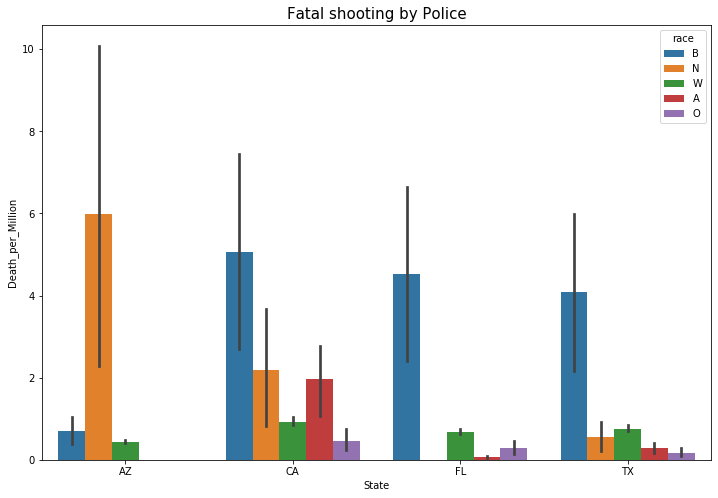

In [28]:
plt.figure(figsize=(12,8))
plt.title("Fatal shooting by Police", fontsize=15)
sns.barplot(x='state',y='deaths_per_million',hue='race',data=race_df).set(xlabel='State',ylabel='Death_per_Million')
plt.savefig(f"Images/StatevsRace.png")
plt.show()

In [29]:
race_df = state_race[['state','race','number_of_deaths']].merge(census_reorder[['race','population']],on='race')
race_df['deaths_per_million'] = race_df['population']/race_df['number_of_deaths']
race_df.head(30)

,state,race,number_of_deaths,population,deaths_per_million
0,AZ,B,17,14.3992,0.847012
1,AZ,B,17,18.9912,1.117129
2,AZ,B,17,52.8080,3.106353
3,AZ,B,17,39.5896,2.328800
4,CA,B,122,14.3992,0.118026
5,CA,B,122,18.9912,0.155666
6,CA,B,122,52.8080,0.432852
7,CA,B,122,39.5896,0.324505
8,FL,B,109,14.3992,0.132103
9,FL,B,109,18.9912,0.174231


## Total Deaths of each Race in each State

In [30]:
# Finding the total death of every race in each state

race_df =race_df.groupby(['state','race'])[['population','deaths_per_million']].sum().reset_index()
race_df

,state,race,population,deaths_per_million
0,AZ,B,125.7880,7.399294
1,AZ,N,19.6472,1.786109
2,AZ,W,941.4256,9.140054
3,CA,A,82.0328,3.038252
4,CA,B,125.7880,1.031049
5,CA,N,19.6472,4.911800
6,CA,O,95.7104,11.963800
7,CA,W,941.4256,4.378724
8,FL,A,82.0328,82.032800
9,FL,B,125.7880,1.154018


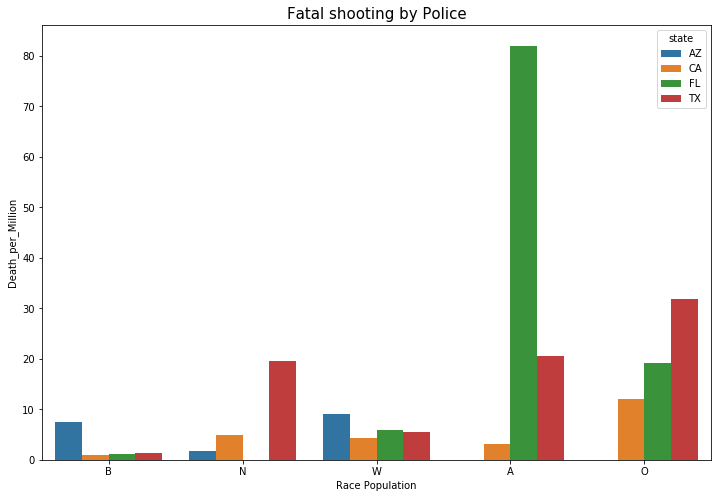

In [31]:
#Plotting the graph

plt.figure(figsize=(12,8))
plt.title("Fatal shooting by Police", fontsize=15)
sns.barplot(x='race',y='deaths_per_million',hue='state',data=race_df).set(xlabel='Race Population',ylabel='Death_per_Million')
plt.savefig(f"Images/RaceineachState.png")
plt.show()

In [32]:
#shoot_data.head()

map_race = shoot_data[['state','armed']].groupby(['state']).count().reset_index()
#map_race = shoot_data.groupby(['state','latitude','longitude','armed'])['armed'].count()

map_race.rename(columns={'armed':'number_of_deaths'},inplace=True)
#map_race

map_race['latitude'] = shoot_data['latitude']
map_race.latitude = map_race.latitude.astype(float)

map_race['longitude'] = shoot_data['longitude']
map_race.longitude = map_race.longitude.astype(float)

map_race['city'] = shoot_data['city']
#map_race.longitude = map_race.longitude.astype(float)
map_race

,state,number_of_deaths,latitude,longitude,city
0,AK,30,47.247,-123.122,Shelton
1,AL,88,45.487,-122.892,Aloha
2,AR,59,37.695,-97.281,Wichita
3,AZ,212,37.763,-122.422,San Francisco
4,CA,681,40.384,-104.692,Evans
5,CO,169,35.877,-97.423,Guthrie
6,CT,19,33.328,-111.841,Chandler
7,DC,14,38.704,-97.564,Assaria
8,DE,10,40.809,-91.119,Burlington
9,FL,324,40.413,-79.991,Knoxville


In [33]:
# Store latitude and longitude in locations
locations = map_race[["latitude", "longitude"]]

# Fill NaN values and convert to float
number_of_deaths = map_race["number_of_deaths"].astype(float)

In [34]:
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>TotalDeaths</dt><dd>{number_of_deaths}</dd>
<dt>City</dt><dd>{city}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
shooting_info = [info_box_template.format(**row) for index, row in map_race.iterrows()]
locations = map_race[["latitude", "longitude"]]

In [35]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=number_of_deaths, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)
# Create symbol layer
shoot_layer = gmaps.marker_layer(
    locations,info_box_content=[info_box_template.format(**row) for index, row in  map_race.iterrows()]
)


# Add layer
fig.add_layer(heat_layer)
fig.add_layer(shoot_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# From 2015 to 2020
To see if there is any continuous upward or downward trend in the daily number of shootings 

In [36]:
# Group dates and number of shootings at each day
shoot_date = shoot_data[['date','armed']].groupby('date').count().sort_values(by='date')
shoot_date.rename(columns={'armed':'count'}, inplace=True)
shoot_date.head()

,count
date,
2015-01-02,2
2015-01-03,1
2015-01-04,3
2015-01-05,1
2015-01-06,4


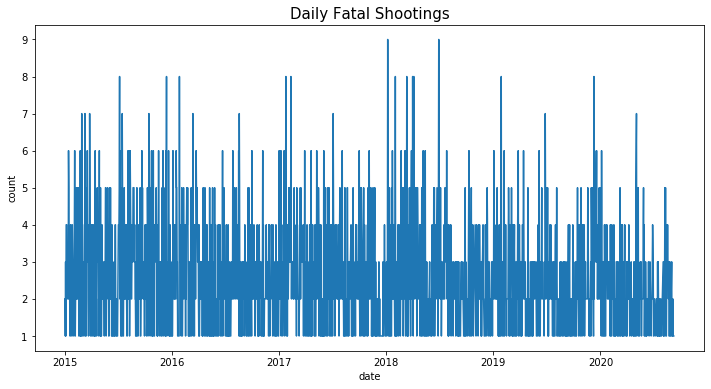

In [40]:
plt.figure(figsize=(12,6))
plt.title('Daily Fatal Shootings', fontsize=15)
sns.lineplot(x=shoot_date.index, y='count', data=shoot_date)
plt.savefig(f"Images/DailyFatalShootings.png")
plt.show()

This does not tell much. It will look better if we plot 10-day averages.

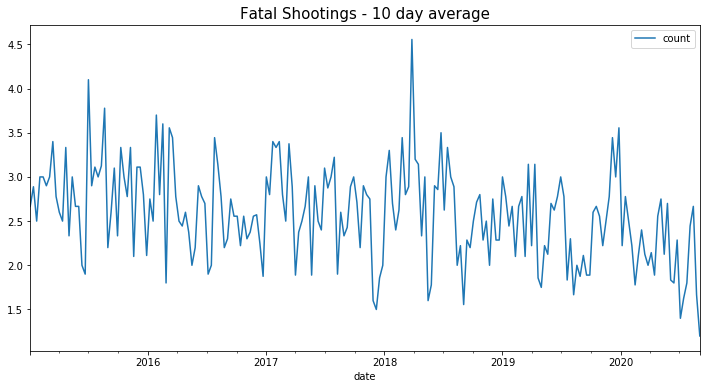

In [39]:
shoot_date.resample('10D').mean().plot(figsize=(12,6))
plt.title('Fatal Shootings - 10 day average', fontsize=15)
plt.savefig(f"Images/10dayave.png")
plt.show()

We can observe some peaks but there is no continuous trend 